In [40]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import re

# Load Data

In [2]:
df = pd.read_csv('Training Data/Phishing_Mitre_Dataset_Summer_of_AI.csv')
df

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1
1,212,16,663,http://www.coffeespecialties.com/...,0
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1
3,198,6,186,http://atomicsoda.com/manutd...,0
4,240,24,1684,http://bostoncoffeecake.com/...,0
...,...,...,...,...,...
4794,52,8,118,http://aridfoods.com/V4/MGen/F97a8a294cf7c5e90...,1
4795,-1,-1,-1,http://www.mazda.co.jp/...,0
4796,-1,-1,-1,http://www.fotografaemsaopaulo.com.br/wp-admin...,1
4797,-1,-1,-1,http://agenda.wehrensarl.ch/libraries/joomla/h...,1


# (Caleb) URL length, Entropy, Third-Level Domain

In [3]:
def entropy(url_string):
    string = url_string.strip()
    prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
    entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
    return abs(entropy)
def has_www(url_string):
    if (url_string.find('www.') == -1):
        return False
    else:
        return True

df['url_length'] = df['URL'].apply(len)
df['url_entropy'] = df['URL'].apply(entropy)
df['3rd_level_domain'] = df['URL'].apply(has_www)

# (Sara) Non-Alpha & Non-Alphanumeric Char Count

#### Counts From Full URL

In [30]:
df['count_non_alpha_num_full'] = df['URL'].str.findall(r'[^a-zA-Z0-9]').str.len()
df['count_non_alpha_full'] = df['URL'].str.findall(r'[^a-zA-Z]').str.len()

count of non-alphanumeric characters in full url


,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0,2244.0,9.702317,1.572324,8.0,9.0,9.0,10.0,20.0
1,2555.0,12.323679,2.345067,7.0,11.0,12.0,14.0,31.0


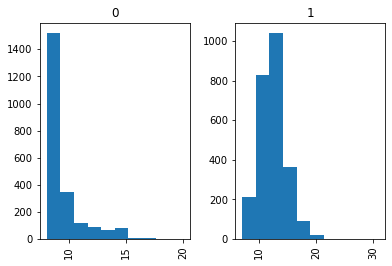

In [16]:
print('count of non-alphanumeric characters in full url')
df['count_non_alpha_num_full'].hist(by=df['Label'])
df.groupby(['Label'])['count_non_alpha_num_full'].describe()

count of non-alpha characters in full url


,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0,2244.0,9.894385,2.054753,8.0,9.0,9.0,10.0,27.0
1,2555.0,16.868102,7.281200,7.0,12.0,14.0,20.0,50.0


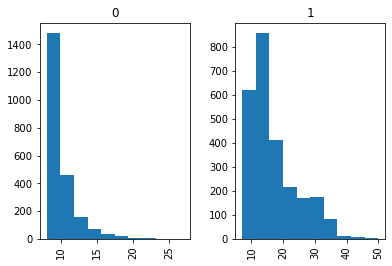

In [17]:
print('count of non-alpha characters in full url')
df['count_non_alpha_full'].hist(by=df['Label'])
df.groupby(['Label'])['count_non_alpha_full'].describe()

Non-alpha and non-alphanumeric counts both seem to have a decent difference comparing label=0 vs label=1. Seems worth using. Perhaps let's try with non-alpha since the difference is more dramatic.

#### Parse URLs

In [18]:
#https://docs.python.org/3/library/urllib.parse.html

parsed_urls = []
for ix,url in enumerate(df['URL']):
    parsed_urls.append(urlparse(url))
    
parsed_df = pd.DataFrame(parsed_urls)
parsed_df

,scheme,netloc,path,params,query,fragment
0,http,account-google-com.ngate.my,/c44cca401760e0c1e12587f9b833f8e5...,,,
1,http,www.coffeespecialties.com,/...,,,
2,http,black.pk,/wp-content/2013/04/bp.postale/96306090ce26bb6...,,,
3,http,atomicsoda.com,/manutd...,,,
4,http,bostoncoffeecake.com,/...,,,
...,...,...,...,...,...,...
4794,http,aridfoods.com,/V4/MGen/F97a8a294cf7c5e90ac925a6fdb110db0/,,dispat...,
4795,http,www.mazda.co.jp,/...,,,
4796,http,www.fotografaemsaopaulo.com.br,/wp-admin/js/gdoc/e069bf42ab31aba...,,,
4797,http,agenda.wehrensarl.ch,/libraries/joomla/hollyuk/hollyuk/10d82/dir...,,,


#### Merge

In [35]:
merged_df = pd.concat((df,parsed_df),axis=1)
merged_df

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain,num_non_alphanumeric_full,num_non_alpha_full,count_non_alpha_num_full,count_non_alpha_full,scheme,netloc,path,params,query,fragment,count_non_alpha_num_netloc,count_non_alpha_netloc
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1,70,4.612783,False,11,32,11,32,http,account-google-com.ngate.my,/c44cca401760e0c1e12587f9b833f8e5...,,,,4,4
1,212,16,663,http://www.coffeespecialties.com/...,0,36,3.819114,True,9,9,9,9,http,www.coffeespecialties.com,/...,,,,2,2
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1,73,4.370385,False,14,35,14,35,http,black.pk,/wp-content/2013/04/bp.postale/96306090ce26bb6...,,,,1,1
3,198,6,186,http://atomicsoda.com/manutd...,0,31,3.695501,False,8,8,8,8,http,atomicsoda.com,/manutd...,,,,1,1
4,240,24,1684,http://bostoncoffeecake.com/...,0,31,3.760017,False,8,8,8,8,http,bostoncoffeecake.com,/...,,,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,52,8,118,http://aridfoods.com/V4/MGen/F97a8a294cf7c5e90...,1,73,4.742582,False,12,31,12,31,http,aridfoods.com,/V4/MGen/F97a8a294cf7c5e90ac925a6fdb110db0/,,dispat...,,1,1
4795,-1,-1,-1,http://www.mazda.co.jp/...,0,26,3.507380,True,10,10,10,10,http,www.mazda.co.jp,/...,,,,3,3
4796,-1,-1,-1,http://www.fotografaemsaopaulo.com.br/wp-admin...,1,73,4.579566,True,14,21,14,21,http,www.fotografaemsaopaulo.com.br,/wp-admin/js/gdoc/e069bf42ab31aba...,,,,3,3
4797,-1,-1,-1,http://agenda.wehrensarl.ch/libraries/joomla/h...,1,73,4.441882,False,14,18,14,18,http,agenda.wehrensarl.ch,/libraries/joomla/hollyuk/hollyuk/10d82/dir...,,,,2,2


#### Counts From Partial URL

In [37]:
merged_df['count_non_alpha_num_netloc'] = merged_df['netloc'].str.findall(r'[^a-zA-Z0-9]').str.len()
merged_df['count_non_alpha_netloc'] = merged_df['netloc'].str.findall(r'[^a-zA-Z]').str.len()

count of non-alphanumeric characters in partial url


,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0,2244.0,2.136809,0.581709,1.0,2.0,2.0,2.0,6.0
1,2555.0,2.195303,1.410824,1.0,1.0,2.0,3.0,14.0


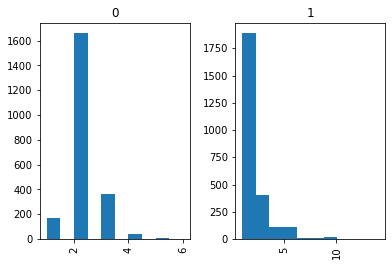

In [41]:
print('count of non-alphanumeric characters in partial url')
merged_df['count_non_alpha_num_netloc'].hist(by=merged_df['Label'])
merged_df.groupby(['Label'])['count_non_alpha_num_netloc'].describe()

count of non-alpha characters in partial url


,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0,2244.0,2.188503,0.678063,1.0,2.0,2.0,2.0,9.0
1,2555.0,2.736986,2.827406,1.0,1.0,2.0,3.0,33.0


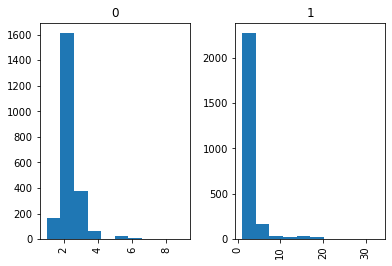

In [42]:
print('count of non-alpha characters in partial url')
merged_df['count_non_alpha_netloc'].hist(by=merged_df['Label'])
merged_df.groupby(['Label'])['count_non_alpha_netloc'].describe()

Not much difference using just netloc from parsed urls. We should stick with the full url.